# S&P 500 지수의 현재와 1987년 블랙먼데이

#### 2020 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)

https://nbviewer.jupyter.org/gist/FinanceData/288907a51a3dac946337b496beffcd07

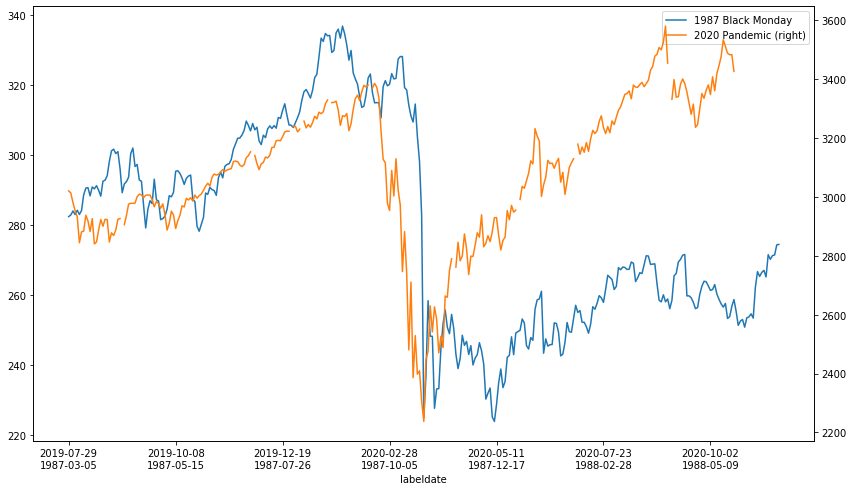

In [8]:
%matplotlib inline
# 2020 FinanceData.KR
import pandas as pd
from datetime import datetime, timedelta

# Yahoo 1928~현재 S&P500 지수 데이터
url = 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=9999999999&interval=1d&events=history'
sp500 = pd.read_csv(url, parse_dates=True, index_col='Date')

days240 = timedelta(days=240) # 1년

# Black monday 1987-10-19
black_mondy = datetime(1987,10,19)
black_mondy = datetime(1987,10,19)
ts1 = sp500[black_mondy - days240:black_mondy + days240]['Adj Close']
# ts1.index = ts1.index.shift(11837, freq='D')
ts1.index = ts1.index.shift(11844, freq='D')
,
# Pandemic 2020-03-13
start = datetime(2020, 3, 13)
ts2 = sp500[start - days240:start + days240]['Adj Close']
# ts2.index = ts2.index.shift(-11837, freq='D')

df_plot = pd.DataFrame()
df_plot['1987 Black Monday'] = ts1
df_plot['2020 Pandemic'] = ts2
df_plot['labeldate'] = [str(x)[:10] + '\n' + str(x-(start-black_mondy))[:10] for x in df_plot.index]
df_plot = df_plot.set_index('labeldate')
df_plot
_ = df_plot.plot(secondary_y='2020 Pandemic', figsize=(14,8))

In [9]:
ts1.index.shift(11837, freq='D')

DatetimeIndex(['2051-12-25', '2051-12-26', '2051-12-27', '2051-12-28',
               '2051-12-29', '2052-01-01', '2052-01-02', '2052-01-03',
               '2052-01-04', '2052-01-05',
               ...
               '2053-04-03', '2053-04-04', '2053-04-07', '2053-04-08',
               '2053-04-09', '2053-04-10', '2053-04-11', '2053-04-14',
               '2053-04-15', '2053-04-16'],
              dtype='datetime64[ns]', name='Date', length=333, freq=None)

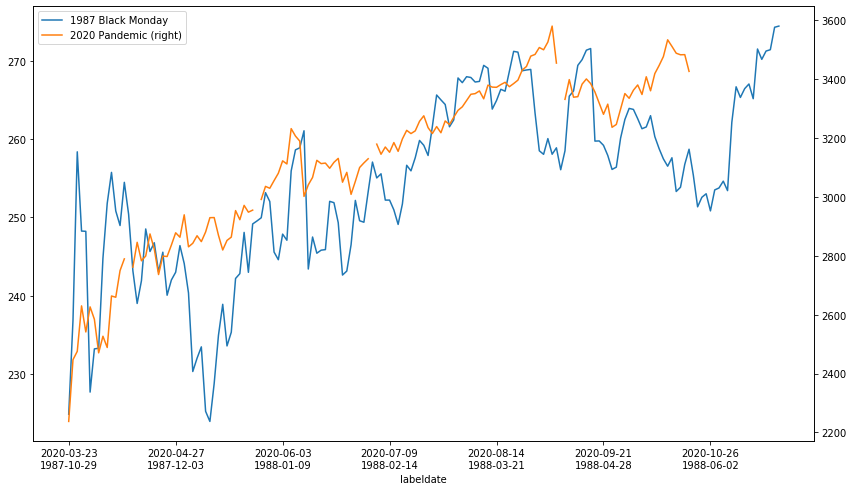

In [10]:
_ = df_plot[int(len(df_plot)/2):].plot(secondary_y='2020 Pandemic', figsize=(14,8))

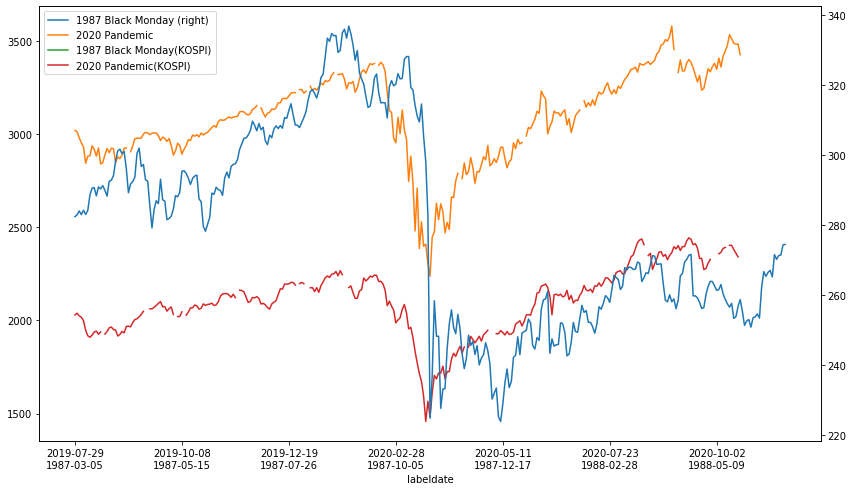

In [11]:
# Yahoo 1928~현재 KOSPI지수 데이터
url = 'https://query1.finance.yahoo.com/v7/finance/download/%5EKS11?period1=-1325635200&period2=9999999999&interval=1d&events=history'
kospi = pd.read_csv(url, parse_dates=True, index_col='Date')

days240 = timedelta(days=240) # 1년

# Black monday 1987-10-19
black_mondy = datetime(1987,10,19)
ts3 = kospi[black_mondy - days240:black_mondy + days240]['Adj Close']
ts3.index = ts3.index.shift(11837, freq='D')

# Pandemic 2020-03-13
start = datetime(2020, 3, 13)
ts4 = kospi[start - days240:start + days240]['Adj Close']
# ts2.index = ts2.index.shift(-11837, freq='D')

df_plot = pd.DataFrame()
df_plot['1987 Black Monday'] = ts1
df_plot['2020 Pandemic'] = ts2
df_plot['1987 Black Monday(KOSPI)'] = ts3
df_plot['2020 Pandemic(KOSPI)'] = ts4
df_plot['labeldate'] = [str(x)[:10] + '\n' + str(x-(start-black_mondy))[:10] for x in df_plot.index]
df_plot = df_plot.set_index('labeldate')
df_plot
_ = df_plot.plot(secondary_y='1987 Black Monday', figsize=(14,8))

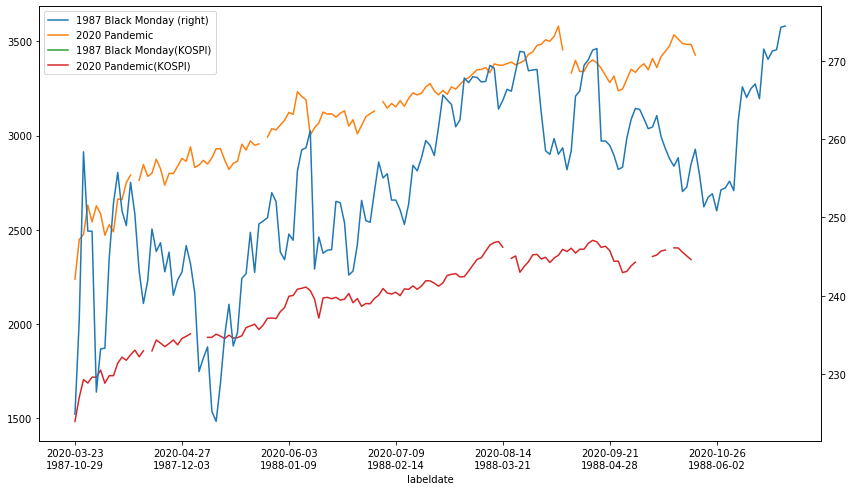

In [12]:
_ = df_plot[int(len(df_plot)/2):].plot(secondary_y='1987 Black Monday', figsize=(14,8))

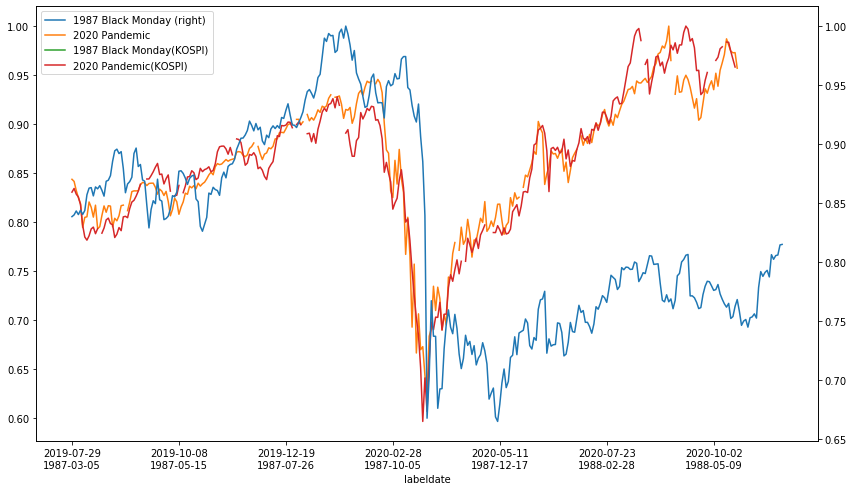

In [13]:

df_plot = pd.DataFrame()
df_plot['1987 Black Monday'] = ts1 / ts1.max()
df_plot['2020 Pandemic'] = ts2 / ts2.max()
df_plot['1987 Black Monday(KOSPI)'] = ts3 / ts3.max()
df_plot['2020 Pandemic(KOSPI)'] = ts4 / ts4.max()
df_plot['labeldate'] = [str(x)[:10] + '\n' + str(x-(start-black_mondy))[:10] for x in df_plot.index]
df_plot = df_plot.set_index('labeldate')
df_plot
_ = df_plot.plot(secondary_y='1987 Black Monday', figsize=(14,8))

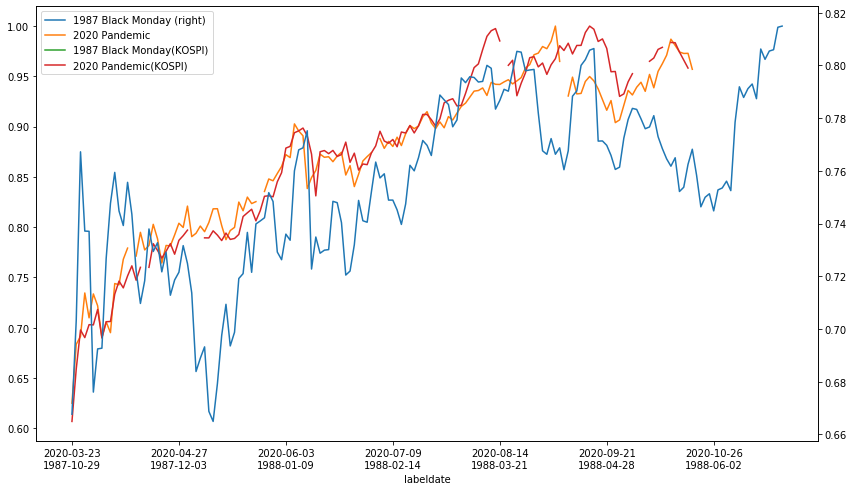

In [14]:
_ = df_plot[int(len(df_plot)/2):].plot(secondary_y='1987 Black Monday', figsize=(14,8))

#### 2020 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)